Weight regularization methods like weight decay introduce a penalty to the loss function when training a neural network to encourage the network to use small weights.

Smaller weights in a neural network can result in a model that is more stable and less likely to overfit the training dataset, in turn having better performance when making a prediction on new data.

Unlike weight regularization, a weight constraint is a trigger that checks the size or magnitude of the weights and scales them so that they are all below a pre-defined threshold. The constraint forces weights to be small and can be used instead of weight decay and in conjunction with more aggressive network configurations, such as very large learning rates.

The use of __weight constraint regularization__ is an alternative to __weight penalties__ to reduce overfitting in deep neural networks.

- Weight penalties encourage but do not require neural networks to have small weights.
- Weight constraints, such as the L2 norm and maximum norm, can be used to force neural networks to have small weights during training.
- Weight constraints can improve generalization when used in conjunction with other regularization methods like dropout.

#### Alternative to Penalties for Large Weights

Large weights in a neural network are a sign of overfitting.

A network with large weights has very likely learned the statistical noise in the training data. This results in a model that is unstable, and very sensitive to changes to the input variables. In turn, the overfit network has poor performance when making predictions on new unseen data.

A popular and effective technique to address the problem is to update the loss function that is optimized during training to take the size of the weights into account.

This is called a __penalty__, as the larger the weights of the network become, the more the network is penalized, resulting in __larger loss__ and, in turn, larger updates. The effect is that the penalty encourages weights to be small, or no larger than is required during the training process, in turn reducing overfitting.

A problem in using a penalty is that although it does encourage the network toward smaller weights, it does not force smaller weights. A neural network trained with weight regularization penalty may still allow large weights, in some cases very large weights.

#### Force Small Weights

An alternate solution to using a penalty for the size of network weights is to use a weight constraint.

A weight constraint is an update to the network that checks the size of the weights, and if the size exceeds a predefined limit, the weights are rescaled so that their size is below the limit or between a range.

You can think of a weight constraint as an if-then rule checking the size of the weights while the network is being trained and only coming into effect and making weights small when required. 

Weight constraints prove especially useful when you have configured your network to use alternative regularization methods to weight regularization and yet still desire the network to have small weights in order to reduce overfitting. One often-cited example is the use of a weight constraint regularization with dropout regularization.

### How to Use a Weight Constraint
A constraint is enforced on each node within a layer.

All nodes within the layer use the same constraint, and often multiple hidden layers within the same network will use the same constraint.

Recall that when we talk about the vector norm in general, that this is the magnitude of the vector of weights in a node, and by default is calculated as the L2 norm, e.g. the square root of the sum of the squared values in the vector.

Some examples of constraints that could be used include:
- Force the vector norm to be 1.0 (e.g. the unit norm).
- Limit the maximum size of the vector norm (e.g. the maximum norm).
- Limit the minimum and maximum size of the vector norm (e.g. the min_max norm).

The maximum norm, also called max-norm or maxnorm, is a popular constraint because it is less aggressive than other norms such as the unit norm, simply setting an upper bound.

When using a limit or a range, a hyperparameter must be specified. Given that weights are small, the hyperparameter too is often a small integer value, such as a value between 1 and 4.

If the norm exceeds the specified range or limit, the weights are rescaled or normalized such that their magnitude is below the specified parameter or within the specified range.

#### Tips for Using Weight Constraints
##### Use With All Network Types

Weight constraints are a generic approach.

They can be used with most, perhaps all, types of neural network models, not least the most common network types of Multilayer Perceptrons, Convolutional Neural Networks, and Long Short-Term Memory Recurrent Neural Networks.

In the case of LSTMs, it may be desirable to use different constraints or constraint configurations for the input and recurrent connections.

##### Standardize Input Data

It is a good general practice to rescale input variables to have the same scale.

When input variables have different scales, the scale of the weights of the network will, in turn, vary accordingly. This introduces a problem when using weight constraints because large weights will cause the constraint to trigger more frequently.

This problem can be done by either normalization or standardization of input variables.

##### Use a Larger Learning Rate

The use of a weight constraint allows you to be more aggressive during the training of the network.

Specifically, a larger learning rate can be used, allowing the network to, in turn, make larger updates to the weights each update.

This is cited as an important benefit to using weight constraints. Such as the use of a constraint in conjunction with dropout

#### Try Other Constraints

Explore the use of other weight constraints, such as a minimum and maximum range, non-negative weights, and more.

You may also choose to use constraints on some weights and not others, such as not using constraints on bias weights in an MLP or not using constraints on recurrent connections in an LSTM.

### How to Reduce Overfitting Using Weight Constraints in Keras
Using a constraint generally involves setting the kernel_constraint argument on the layer for the input weights and the bias_constraint for the bias weights.

Generally, weight constraints are not used on the bias weights.

A suite of different vector norms can be used as constraints, provided as classes in the keras.constraints module. They are:
- Maximum norm (max_norm), to force weights to have a magnitude at or below a given limit.
- Non-negative norm (non_neg), to force weights to have a positive magnitude.
- Unit norm (unit_norm), to force weights to have a magnitude of 1.0.
- Min-Max norm (min_max_norm), to force weights to have a magnitude between a range.

In [1]:
# For example, a constraint can imported and instantiated:
# import norm
from keras.constraints import max_norm
# instantiate norm
norm = max_norm(3.0)

#### Weight Constraints on Layers

The weight norms can be used with most layers in Keras.

In [ ]:
# MLP Weight Constraint
## The example below sets a maximum norm weight constraint on a Dense fully connected layer.
from keras.layers import Dense
from keras.constraints import max_norm

model.add(Dense(32, kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))

In [ ]:
# CNN Weight Constraint
## The example below sets a maximum norm weight constraint on a convolutional layer
from keras.layers import Conv2D
from keras.constraints import max_norm

model.add(Conv2D(32, (3,3), kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))

##### RNN Weight Constraint

Unlike other layer types, recurrent neural networks allow you to set a weight constraint on both the input weights and bias, as well as the recurrent input weights.

The constraint for the recurrent weights is set via the recurrent_constraint argument to the layer.

In [ ]:
# The example below sets a maximum norm weight constraint on an LSTM layer.
from keras.layers import LSTM
from keras.constraints import max_norm

model.add(LSTM(32, kernel_constraint=max_norm(3), recurrent_constraint=max_norm(3), bias_constraint=max_norm(3)))

### Weight Constraint Case Study
#### use weight constraints to reduce overfitting of an MLP on a simple binary classification problem
data: two semi-circles of observations, one semi-circle for each class.

Each observation has two input variables with the same scale and a class output value of either 0 or 1.

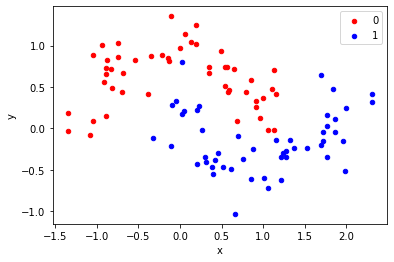

In [5]:
# generate two moons dataset
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise=0.2, random_state=1)

# scatter plot, dots colored by class value
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

This is a good test problem because the classes cannot be separated by a line, e.g. are not linearly separable, requiring a nonlinear method such as a neural network to address.

We have only generated 100 samples, which is small for a neural network, providing the opportunity to overfit the training dataset and have higher error on the test dataset: a good case for using regularization. Further, the samples have noise, giving the model an opportunity to learn aspects of the samples that don’t generalize.

In [10]:
#split the dataset into train set and test set,using 30 examples to train the model
from sklearn.model_selection import train_test_split
trainX,testX,trainy,testy = train_test_split(X,y,test_size=0.7)

#### Define a Multilayer Perceptron model
The model will have one hidden layer with more nodes than may be required to solve this problem, providing an opportunity to overfit.

The hidden layer uses 500 nodes in the hidden layer and the rectified linear activation function. A sigmoid activation function is used in the output layer in order to predict class values of 0 or 1.

The model is optimized using the binary cross entropy loss function, suitable for binary classification problems and the efficient Adam version of gradient descent.

In [11]:
# define model
from keras.layers import Dense
from keras.models import Sequential
def baseline_model(): 
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [12]:
# The defined model is then fit on the training data for 4,000 epochs and the default batch size of 32.
# fit model
history = baseline_model().fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

Train: 0.333, Test: 0.486


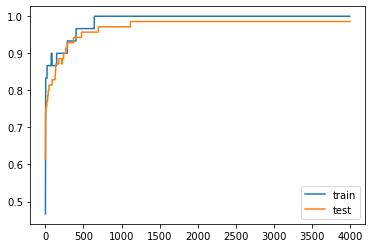

In [14]:
# evaluate the model
_, train_acc = baseline_model().evaluate(trainX, trainy, verbose=0)
_, test_acc = baseline_model().evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

#### Overfit MLP With Weight Constraint
A good simple constraint for this model is to simply normalize the weights so that the norm is equal to 1.0.

This constraint has the effect of forcing all incoming weights to be small.

We can do this by using the _unit_norm_ in Keras. This constraint can be added to the first hidden layer as follows:

In [ ]:
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=unit_norm()))

We can also achieve the same result by using the min_max_norm and setting the min and maximum to 1.0, for example:

In [ ]:
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=min_max_norm(min_value=1.0, max_value=1.0)))

We cannot achieve the same result with the maximum norm constraint as it will allow norms at or below the specified limit; for example:

In [ ]:
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=max_norm(1.0)))

Train: 0.500, Test: 0.200


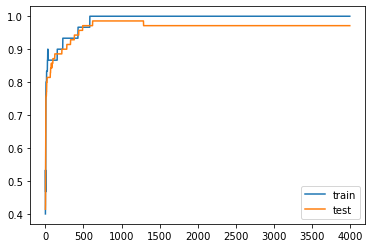

In [16]:
# define a Multilayer Perceptron model with Weight Constraint
from keras.constraints import unit_norm

def weight_constraint_model():
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=unit_norm()))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
# fit model
history = weight_constraint_model().fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = weight_constraint_model().evaluate(trainX, trainy, verbose=0)
_, test_acc = weight_constraint_model().evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

We can see that indeed the strict constraint on the size of the weights has improved the performance of the model on the holdout set without impacting performance on the training set.

Reviewing the line plot of train and test accuracy, we can see that it no longer appears that the model has overfit the training dataset.

Model accuracy on both the train and test sets continues to increase to a plateau.